In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import glob

In [2]:
files = glob.glob('datas\*.csv')

t = 'Time since start of test (s)'
u = 'Pore Pressure (kPa)'
tau_ztheta = 'HCA Tau Theta Z'
gamma = 'HCA Gamma'
epsilon_1 = 'HCA E1'
epsilon_2 = 'HCA E2'
epsilon_3 = 'HCA E3'

font1 = {'family': 'Times New Roman', 'size': 16}

In [3]:
def plot_u(df, ax):
    ax.plot(0.1*df[t], df[u]-df[u][0], 'k')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(which='both', direction='in', labelsize=12)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # ax.minorticks_on()
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('N', fontdict=font1)
    ax.set_ylabel('u / kPa', fontdict=font1)
    ax.xaxis.set_label_coords(1.02,0.06)

In [4]:
def plot_tau(df, ax):
    ax.plot(0.1*df[t], df[tau_ztheta], 'k')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(which='both', direction='in', labelsize=12)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # ax.minorticks_on()
    ax.set_xlim(left=0)
    ax.set_xlabel('N', fontdict=font1)
    ax.set_ylabel(r'$\tau_{z\theta}$ / kPa', fontdict=font1)
    ax.xaxis.set_label_coords(1.02,0.06)

In [5]:
def plot_gamma(df, ax):
    ax.plot(0.1*df[t], df[gamma], 'k')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(which='both', direction='in', labelsize=12)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # ax.minorticks_on()
    ax.set_xlim(left=0)
    ax.set_xlabel('N', fontdict=font1)
    ax.set_ylabel(r'$\gamma_{z\theta}$ / kPa', fontdict=font1)
    ax.xaxis.set_label_coords(1.02,0.06)

In [6]:
def plot_tg(df, ax):
    ax.plot(df[gamma], df[tau_ztheta], 'k')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(which='both', direction='in', labelsize=12)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # ax.minorticks_on()
    ax.set_xlabel(r'$\gamma_{z\theta}$ /%', fontdict=font1)
    ax.set_ylabel(r'$\tau_{z\theta}$ / kPa', fontdict=font1)

In [7]:
def plot_gammag(df, ax):
    e1 = df[epsilon_1] - df[epsilon_1][0]
    e2 = df[epsilon_2] - df[epsilon_2][0]
    e3 = df[epsilon_3] - df[epsilon_3][0]
    gamma_g = np.sqrt(2)/3*np.sqrt((e1-e2)**2 + (e1-e3)**2 + (e2-e3)**2)
    ax.plot(0.1*df[t], gamma_g, 'K')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(which='both', direction='in', labelsize=12)
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # ax.minorticks_on()
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('N', fontdict=font1)
    ax.set_ylabel(r'$\gamma_g$ /%', fontsize = 16)
    ax.xaxis.set_label_coords(1.02,0.06)

In [8]:
plts = [plot_tau, plot_gamma, plot_u, plot_gammag, plot_tg]

KeyError: 'Time since start of test (s)'

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


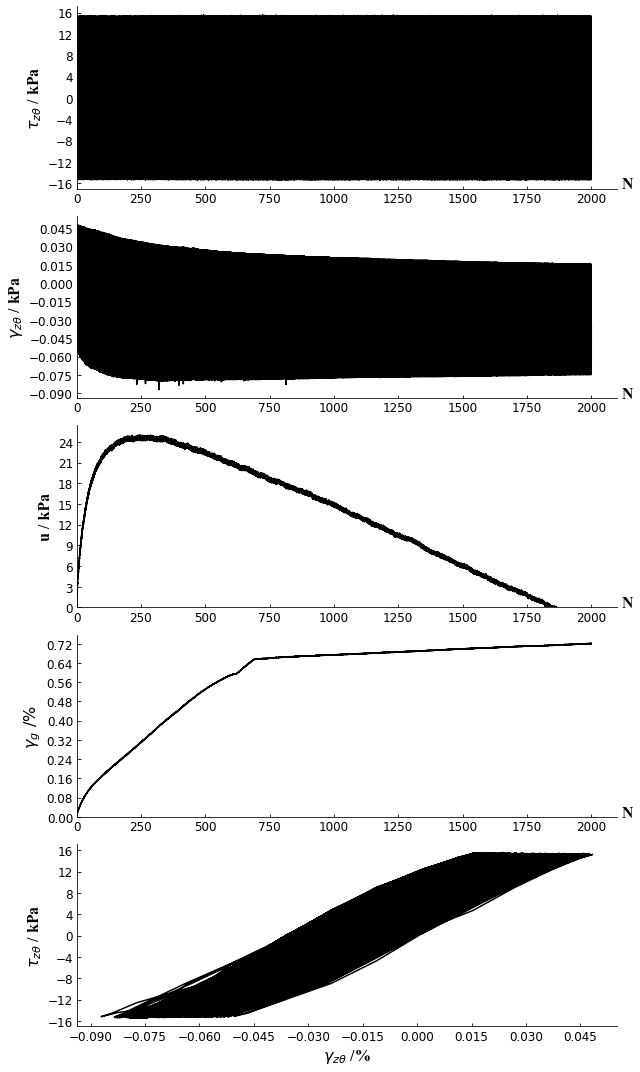

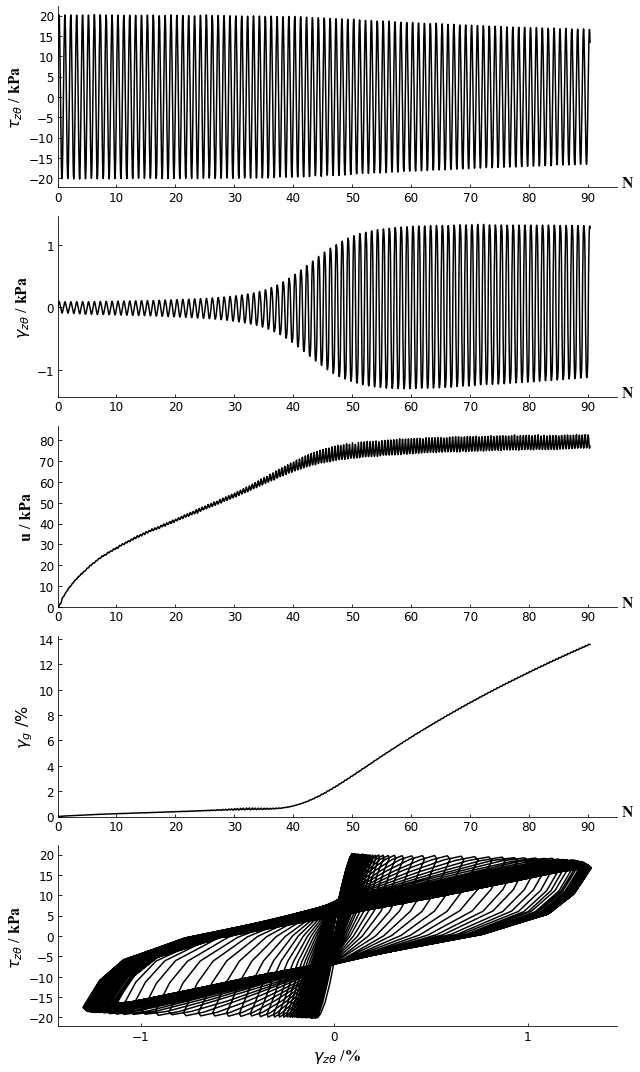

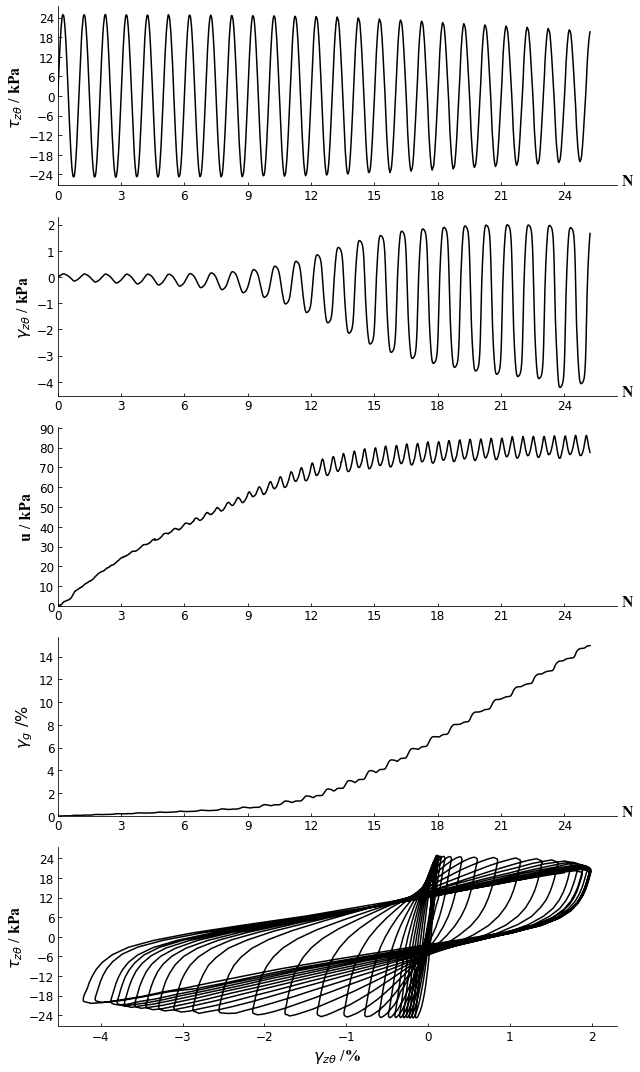

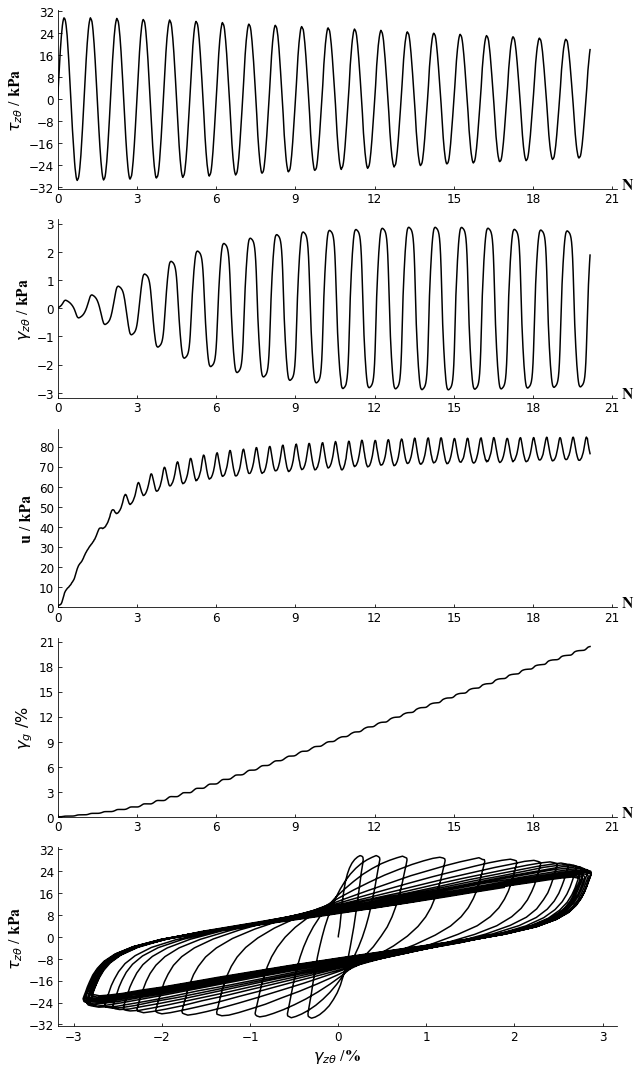

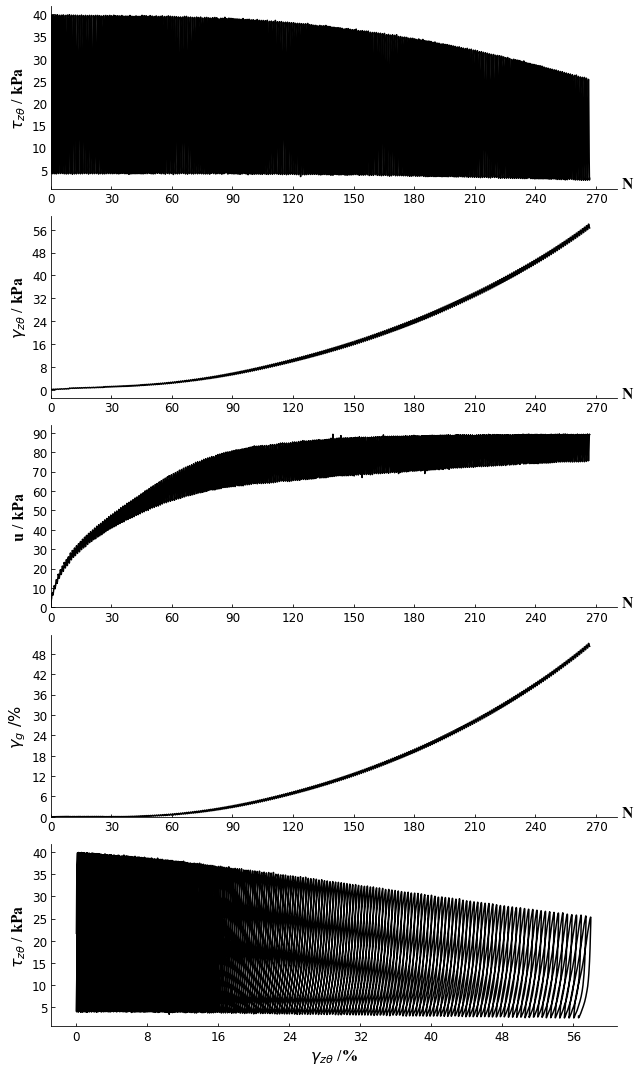

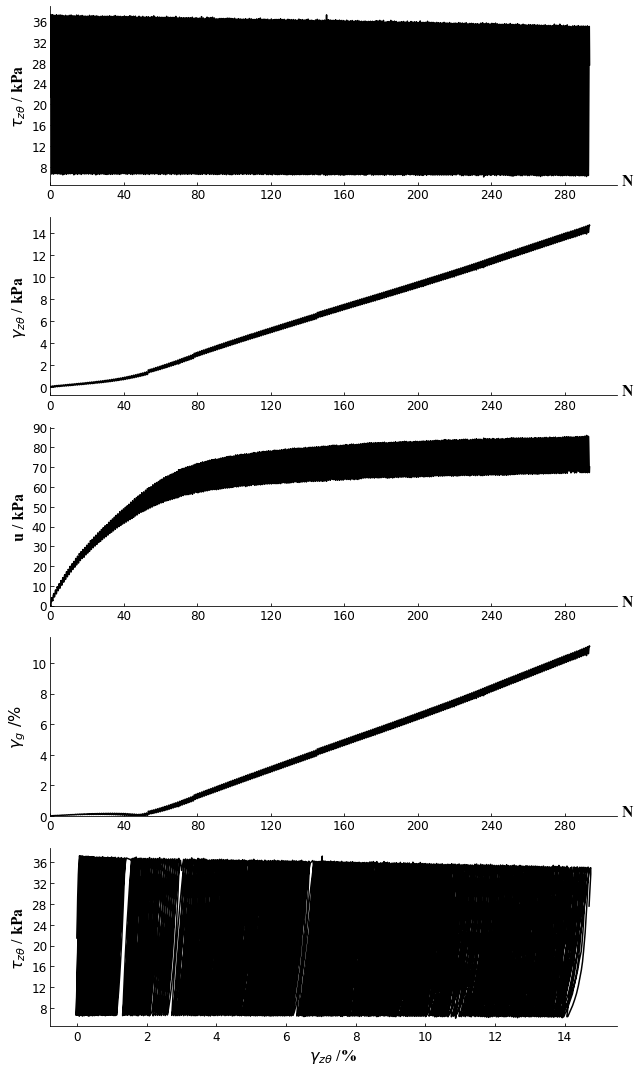

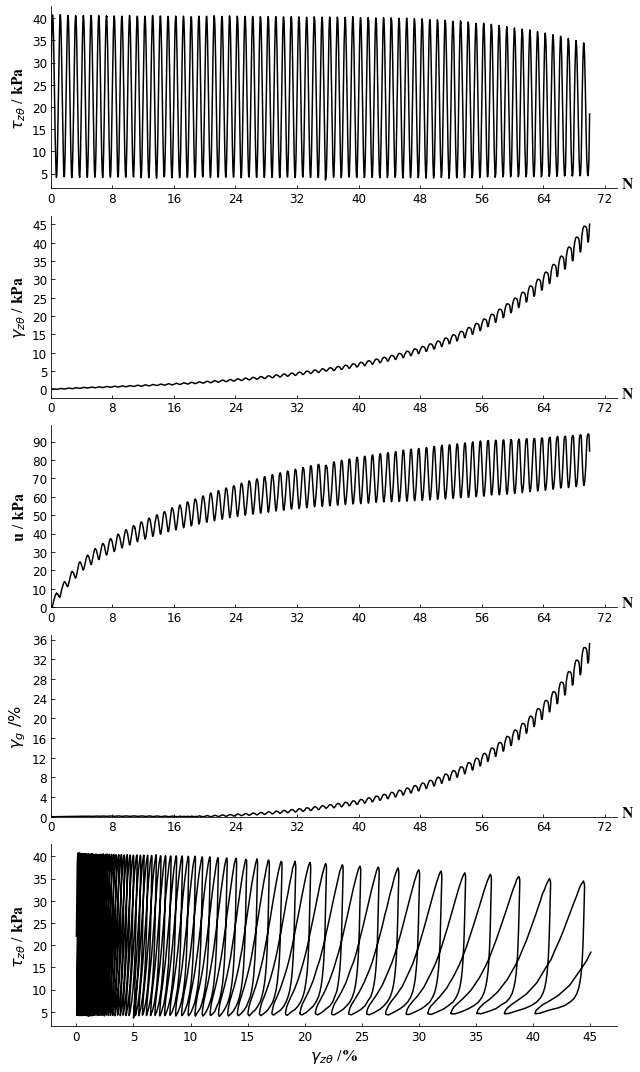

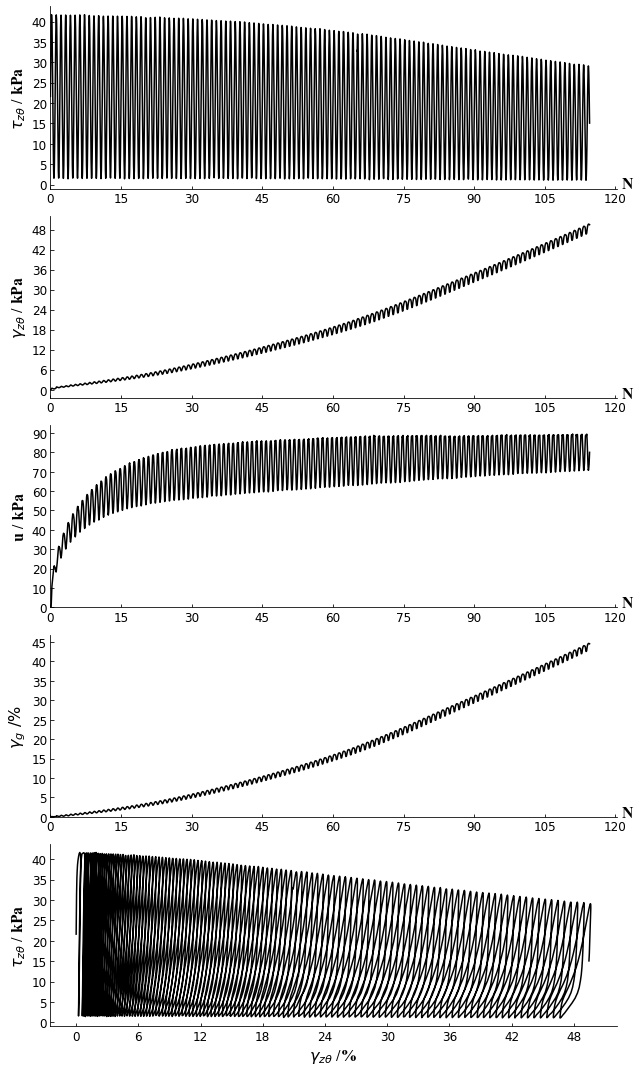

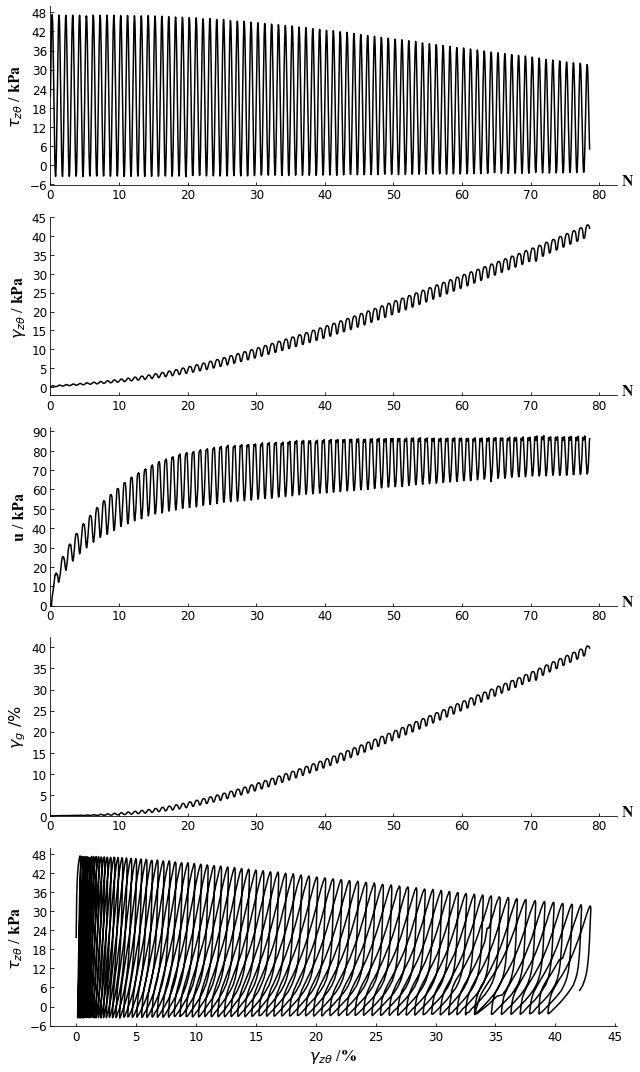

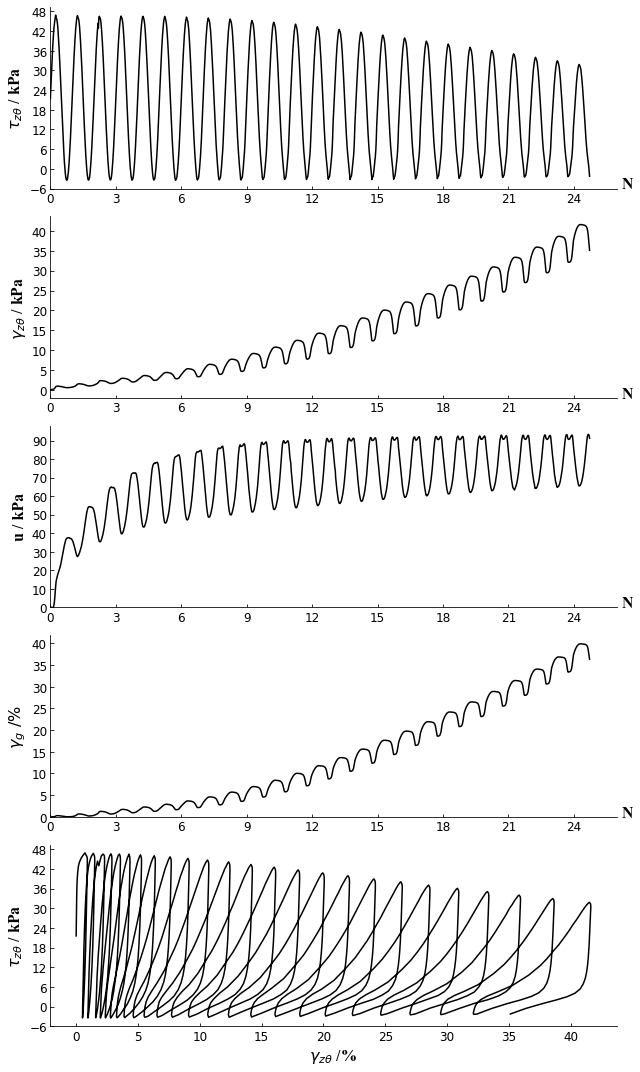

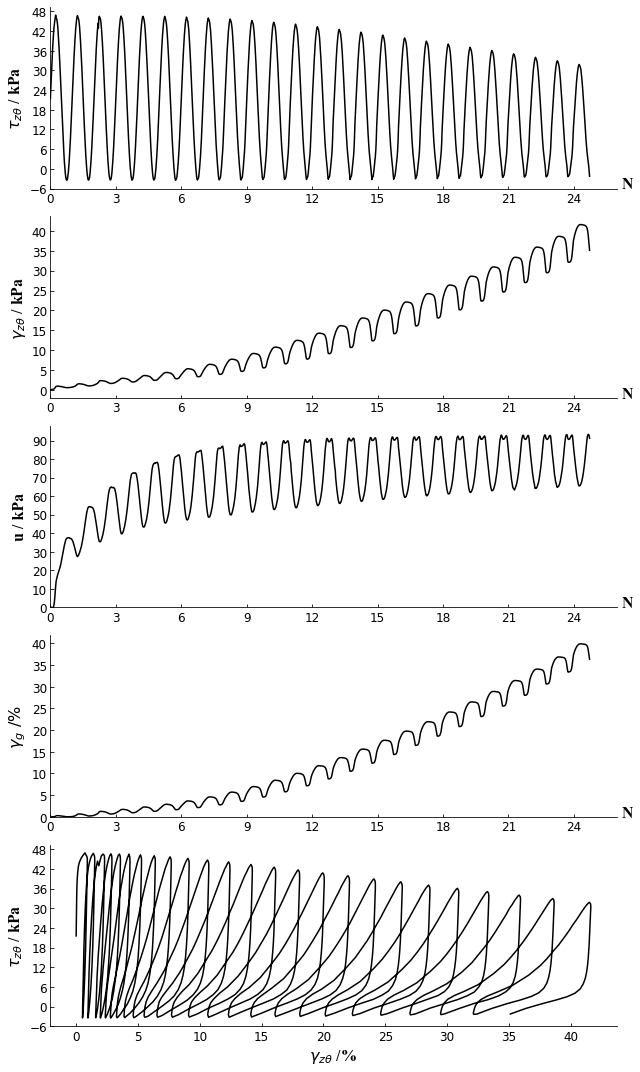

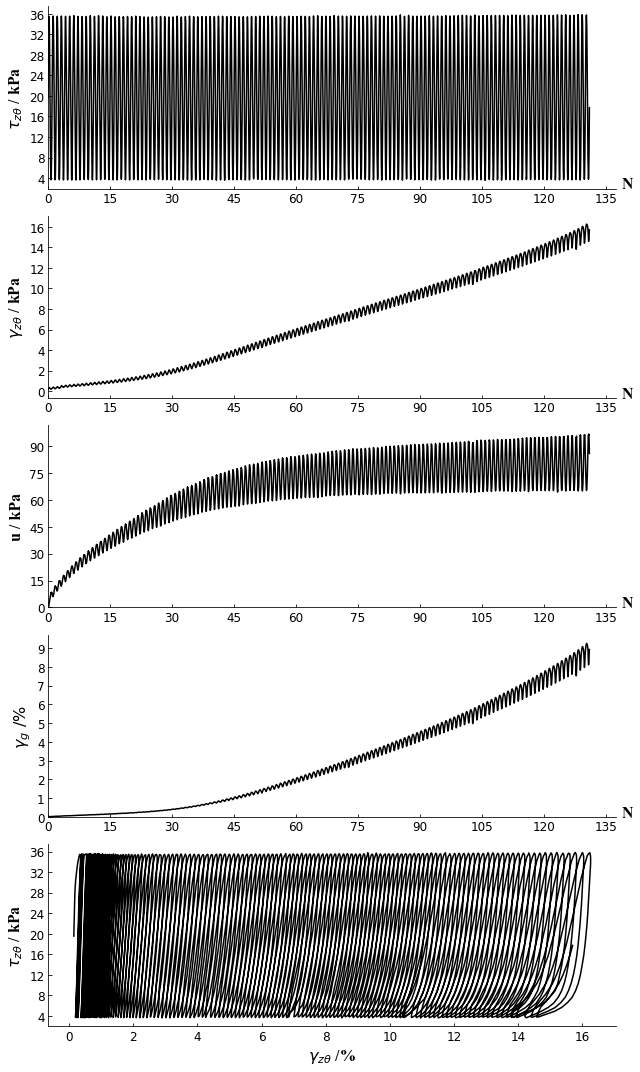

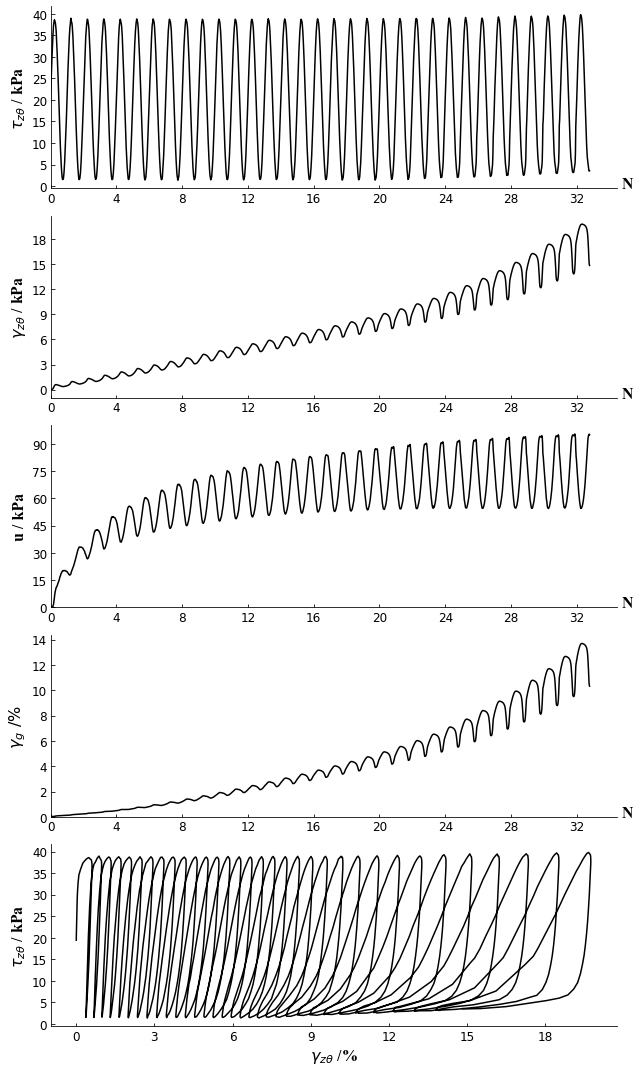

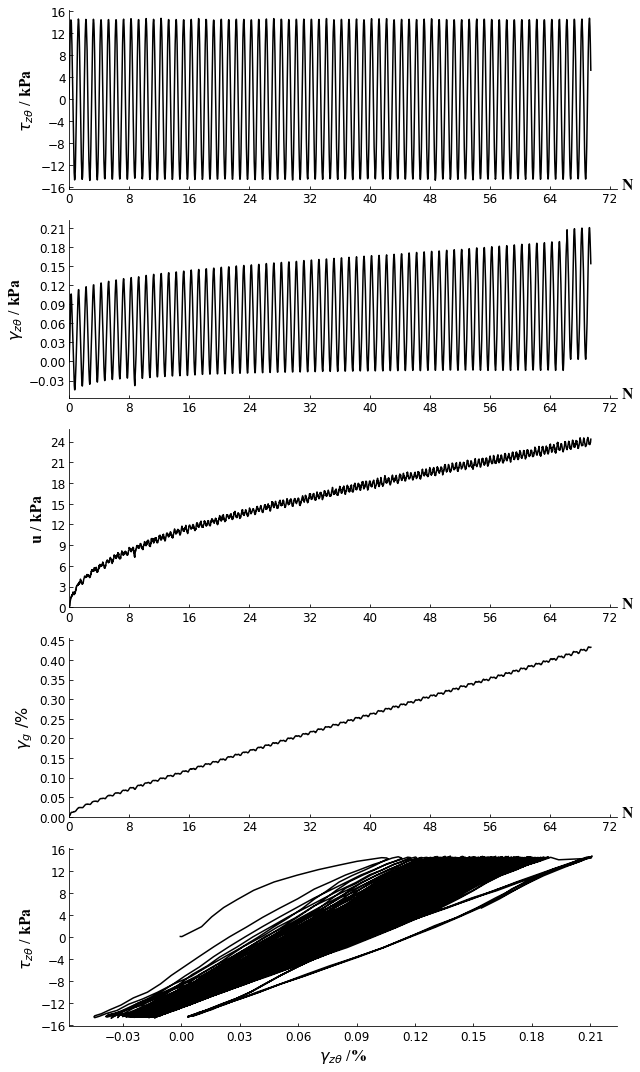

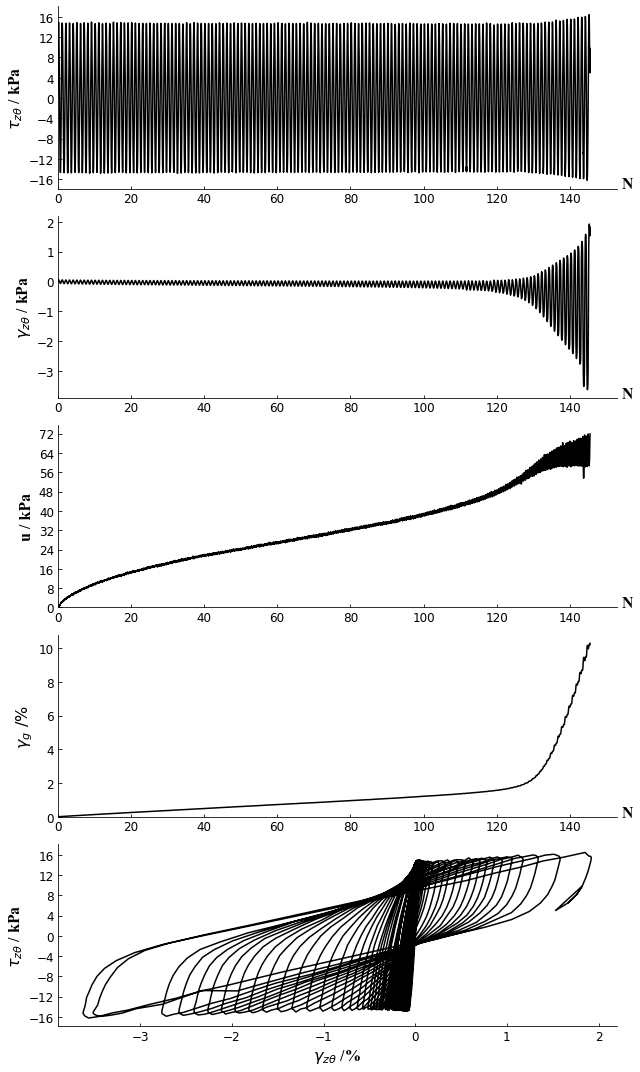

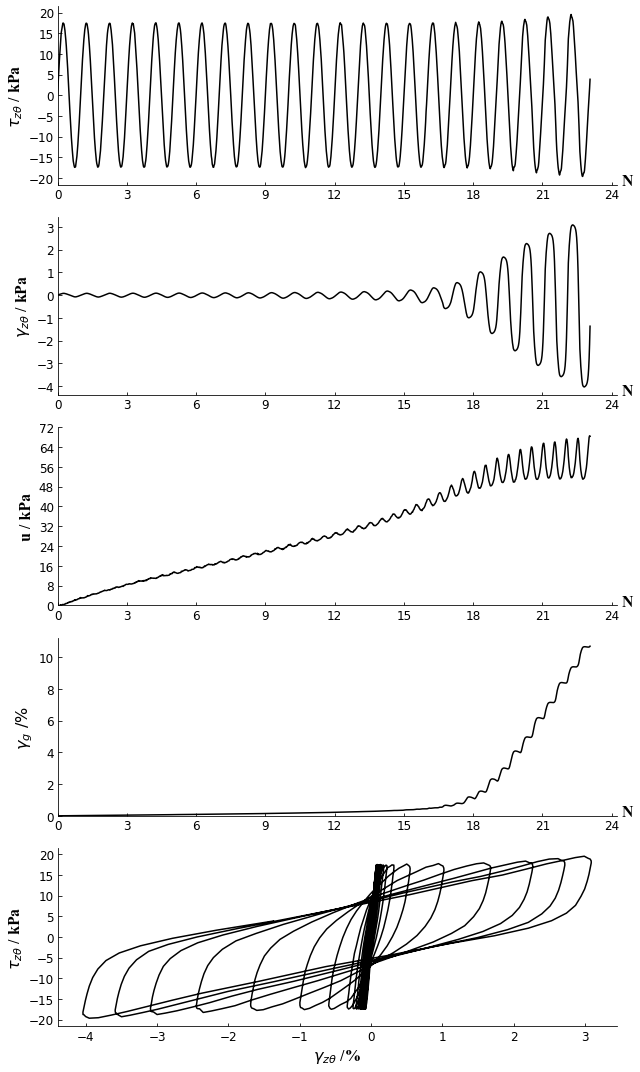

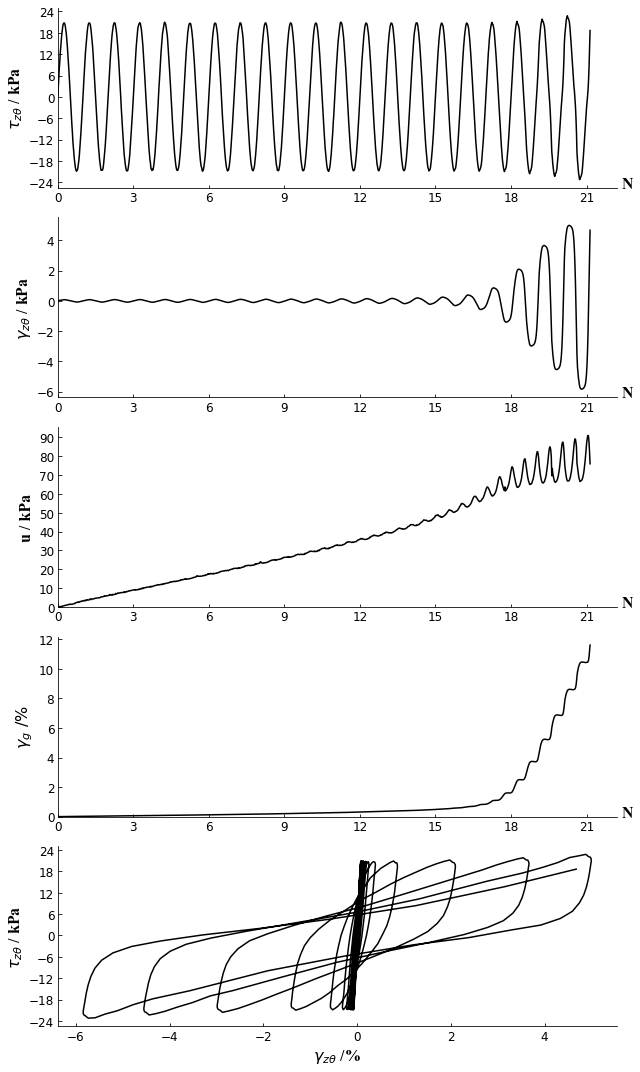

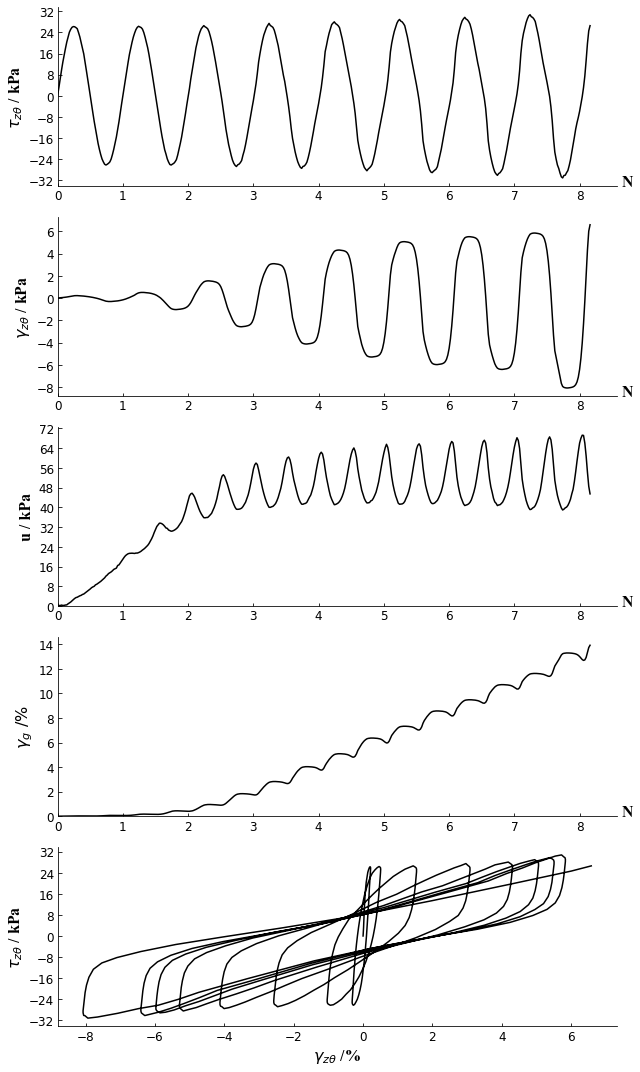

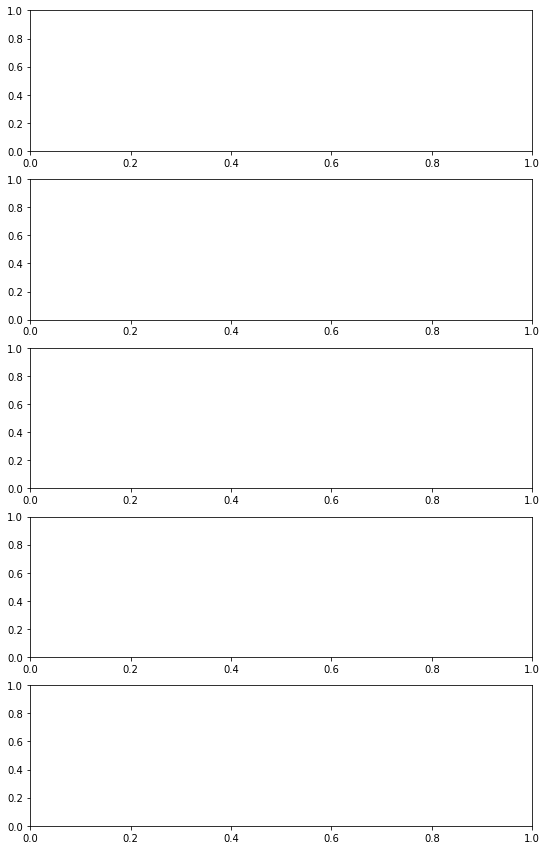

In [9]:
for f in files:
    df = pd.read_csv(f)
    fig, axs = plt.subplots(5,1,figsize=(9,15))
    for i, ax in enumerate(axs):
        plts[i](df, ax)
#     plot_tau(df, fig, (5,1,1))
#     plot_gamma(df, fig, (5,1,2))
#     plot_u(df, fig, (5,1,3))
#     plot_gammag(df, fig, (5,1,4))
#     plot_tg(df, fig, (5,1,5))
    fig.set_tight_layout(True)
    fig.savefig('figs\\' + f[6:-4] + '.png')